# Modelos Multiplos Preditivos - Cap. 8
## 0 - Bibliotecas importadas

In [95]:
import pandas as pd
import numpy as np

## 1 - Carregando dataset 'Wine Quality'
* Dados numéricos;
* Não houve necessidade de fazer tratamento quanto a falta ou inconsistência nos dados;
* 11 características e target sendo sobre a qualidade do vinho (0-qualidade ruim- até 10-Excelente qualidade-);
* Não está balanceado (há mais vinhos normais do que excelentes ou ruins);

### Vinho Branco

In [96]:
df_white = pd.read_csv('./winequality-white.csv', sep = ';')
print("Quantidade amostra = ",df_white['quality'].count())
df_white.head()

Quantidade amostra =  4898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Text(0, 0.5, 'Frequência')

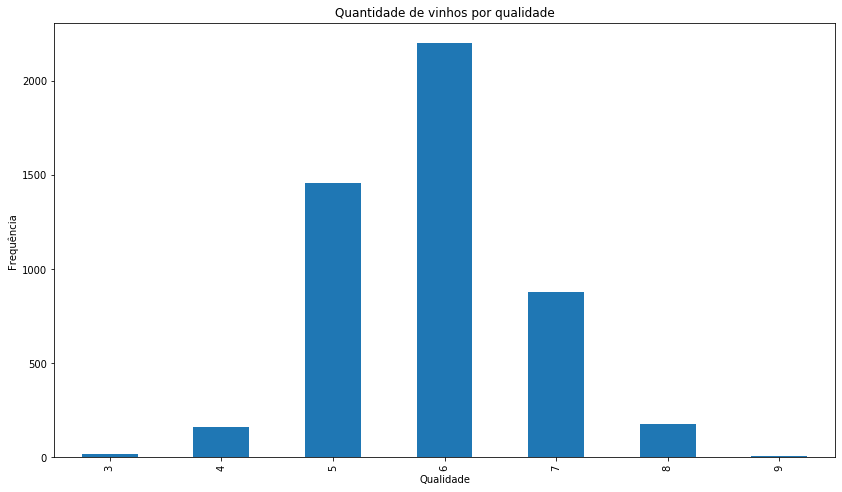

In [97]:
ax = df_white['quality'].value_counts().sort_index().plot.bar(
                                    y = [1,2,3,4,5,6,7,8,9,10,11],
                                    figsize=(14,8),
                                    title="Quantidade de vinhos por qualidade"
                                    )
ax.set_xlabel("Qualidade")
ax.set_ylabel("Frequência")

## 2 - Pré-Processamento

In [98]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

### Agrupando Classes - 2 Classes

In [99]:
classes_2 = []
for i in df_white['quality']:
    if i >= 0 and i <= 5:
        classes_2.append('1')
    elif i >= 6 and i <= 10:
        classes_2.append('2')
df_white['classes_2'] = classes_2  

### Agrupando Classes - 3 Classes

In [100]:
classes_3 = []
for i in df_white['quality']:
    if i >= 0 and i <= 3:
        classes_3.append('1')
    elif i >= 4 and i <= 6:
        classes_3.append('2')
    elif i >= 7 and i <= 10:
        classes_3.append('3')
df_white['classes_3'] = classes_3  
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classes_2,classes_3
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,2,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,2,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,2,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,2,2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,2
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,2,2
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,2,3


### StandardScale
> class sklearn.preprocessing.StandardScaler(**copy**=True, **with_mean**=True, **with_std**=True)

In [55]:
ss = StandardScaler()
df_white_scaler = ss.fit_transform(df_white.values.reshape(-1,1))
df_white_scaler

array([[-0.26012868],
       [-0.42868147],
       [-0.42642742],
       ...,
       [-0.42742922],
       [-0.13991273],
       [-0.28517367]])

## 3 - Treinamento

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# Normalmente, em python, o X tem relação com o dataframe gerado e o 'y' com os valores em target
X = df_white.iloc[:,:11]
y = df_white['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=1)

### Bagging
>class sklearn.ensemble.BaggingClassifier(**base_estimator**=None, **n_estimators**=10, **max_samples**=1.0, **max_features**=1.0, **bootstrap**=True, **bootstrap_features**=False, **oob_score**=False, **warm_start**=False, **n_jobs**=None, **random_state**=None, **verbose**=0)

In [58]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier()
bc.fit(X_train,y_train)
bc_predict = bc.predict(X_test)

### Decision Tree
> class sklearn.tree.DecisionTreeClassifier(**criterion**='gini', **splitter**='best', **max_depth**=None, **min_samples_split**=2, **min_samples_leaf**=1, **min_weight_fraction_leaf**=0.0, **max_features**=None, **random_state**=None, **max_leaf_nodes**=None, **min_impurity_decrease**=0.0, **min_impurity_split**=None, **class_weight**=None, **presort**='deprecated', **ccp_alpha**=0.0)

In [59]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_predict = dtc.predict(X_test)

### Random Forest
> class sklearn.ensemble.RandomForestClassifier(**n_estimators**=100, **criterion**='gini', **max_depth**=None, **min_samples_split**=2, **min_samples_leaf**=1, **min_weight_fraction_leaf**=0.0, **max_features**='auto', **max_leaf_nodes**=None, **min_impurity_decrease**=0.0, **min_impurity_split**=None, **bootstrap**=True, **oob_score**=False, **n_jobs**=None, **random_state**=None, **verbose**=0, **warm_start**=False, **class_weight**=None, **ccp_alpha**=0.0, **max_samples**=None)


In [60]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators= 1000,
                              max_features= 'auto',     
                              bootstrap = 'TRUE',
                              oob_score = 'TRUE',
                              n_jobs = -1)
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)

In [61]:
feature_importantes = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importantes)

                      importance
alcohol                 0.115535
density                 0.103350
volatile acidity        0.102894
free sulfur dioxide     0.093071
total sulfur dioxide    0.090184
pH                      0.086880
residual sugar          0.085620
chlorides               0.084971
citric acid             0.081344
sulphates               0.079911
fixed acidity           0.076240


## 4 - Avaliação

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score

### Bagging

In [63]:
bc_conf_matrix = confusion_matrix(y_test, bc_predict)
bc_acc_score = accuracy_score(y_test, bc_predict)
print(bc_conf_matrix)
print(bc_acc_score*100)

[[  0   0   1   1   0   0]
 [  0   7  20   9   1   0]
 [  0  14 241 104   9   0]
 [  0   3 100 400  37   4]
 [  0   0   7  97 125   4]
 [  0   0   1  16  13  11]]
64.0


### Decision Tree

In [64]:
dtc_conf_matrix = confusion_matrix(y_test, dtc_predict)
dtc_acc_score = accuracy_score(y_test, dtc_predict)
print(dtc_conf_matrix)
print(dtc_acc_score*100)

[[  0   0   1   1   0   0   0]
 [  1   6  19   7   3   1   0]
 [  0  17 215 115  19   2   0]
 [  1   8  98 363  64  10   0]
 [  0   2  12  84 122  13   0]
 [  0   0   0  12  11  17   1]
 [  0   0   0   0   0   0   0]]
59.0204081632653


### Random Forest

#### Matriz de Confusão

In [65]:
rfc_conf_matrix = confusion_matrix(y_test, rfc_predict)
rfc_conf_matrix

array([[  0,   0,   1,   1,   0,   0],
       [  0,   6,  21,  10,   0,   0],
       [  0,   4, 243, 119,   2,   0],
       [  0,   0,  71, 445,  28,   0],
       [  0,   0,   4,  98, 130,   1],
       [  0,   0,   1,  14,  12,  14]])

#### Acurácia

In [66]:
rfc_acc_score = accuracy_score(y_test, rfc_predict)
print('Acurácia =',rfc_acc_score*100)


Acurácia = 68.40816326530611


#### Revocação

#### Precisão

#### F1-Score